In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(0)
a1 = np.random.normal(85, 10, 20)
s1 = pd.DataFrame(a1, columns=['X'], index=range(1, 21))
s1

,X
1,102.640523
2,89.001572
3,94.787380
4,107.408932
5,103.675580
6,75.227221
7,94.500884
8,83.486428
9,83.967811
10,89.105985


- 观察法

In [3]:
# np.where 三目运算符
np.where(a1 > 100, np.nan, a1)

array([        nan, 89.00157208, 94.78737984,         nan,         nan,
       75.2272212 , 94.50088418, 83.48642792, 83.96781148, 89.10598502,
       86.44043571, 99.54273507, 92.61037725, 86.21675016, 89.43863233,
       88.33674327, 99.94079073, 82.94841736, 88.13067702, 76.45904261])

In [4]:
s1.where(s1 <= 100)

,X
1,NaN
2,89.001572
3,94.787380
4,NaN
5,NaN
6,75.227221
7,94.500884
8,83.486428
9,83.967811
10,89.105985


In [6]:
s1.query('X <= 100')

,X
2,89.001572
3,94.787380
6,75.227221
7,94.500884
8,83.486428
9,83.967811
10,89.105985
11,86.440436
12,99.542735
13,92.610377


- 散点图

In [7]:
import matplotlib.pyplot as plt

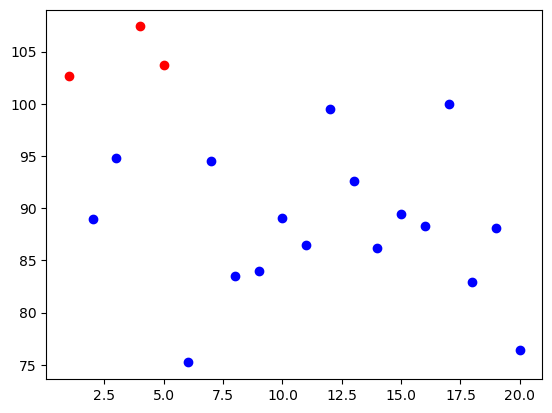

In [8]:
plt.plot(s1.query('X <= 100'), 'bo')
plt.plot(s1.query('X > 100'), 'ro')

- 3signa

In [11]:
# 3digma
# mean计算均值，默认计算每一列的均值， std是计算标准差，同样默认是列
s1.query('X < X.mean() + 3 * X.std() and X > X.mean() - 3 * X.std()')

,X
1,102.640523
2,89.001572
3,94.787380
4,107.408932
5,103.675580
6,75.227221
7,94.500884
8,83.486428
9,83.967811
10,89.105985


- 箱线图

In [12]:
import seaborn as sns

<Axes: >

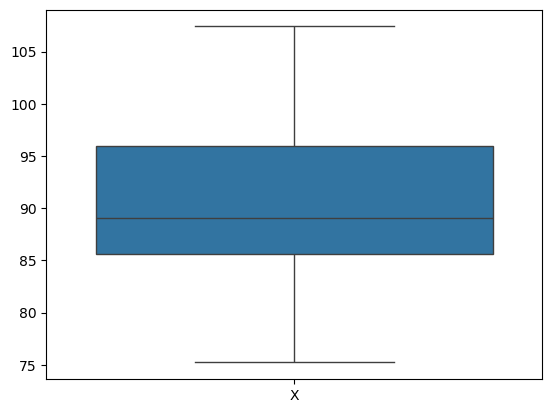

In [13]:
sns.boxplot(s1)

<Axes: >

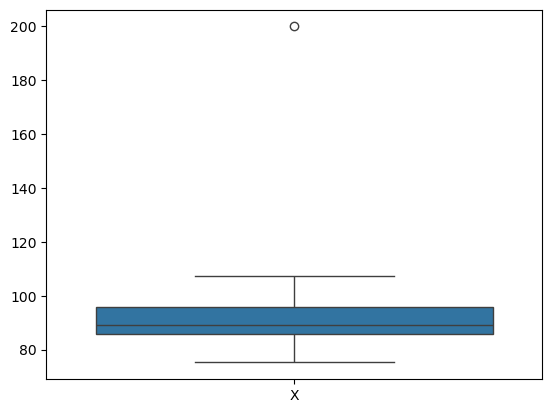

In [14]:
s1.iloc[0] = 200
sns.boxplot(s1)

- 聚类分析

In [15]:
from sklearn.cluster import DBSCAN

<Axes: xlabel='None', ylabel='X'>

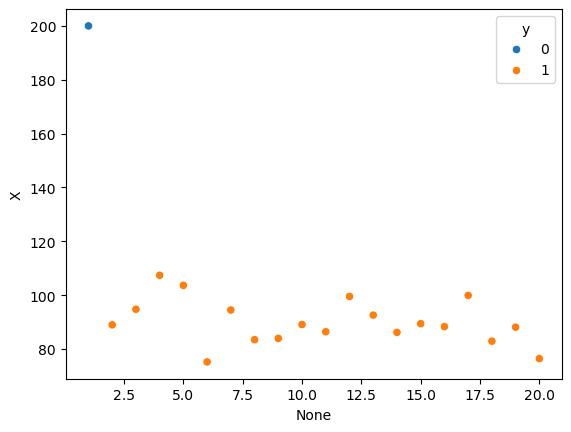

In [16]:
s1['y'] = DBSCAN(min_samples=1, eps=10).fit_predict(s1)
sns.scatterplot(s1, x=s1.index, y='X', hue='y')